# **Hybrid Multi-Objective Metaheuristic Machine Learning for Pandemic Modeling (Part 1)**

### Import Libraries

In [ ]:
!pip install pyswarms
!pip install sklearn-genetic
!pip install shap
!pip install -U pymoo
!pip install lime
!pip install ace_tools
!pip install ace_tools-x.x.x-py3-none-any.whl
!pip install <path-to-the-source-file-or-folder-containing-setup.py>

ERROR: Invalid requirement: 'ace-tools==x.x.x': Expected end or semicolon (after name and no valid version specifier)
    ace-tools==x.x.x
             ^
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install <path-to-the-source-file-or-folder-containing-setup.py>'


In [ ]:
import pandas as pd
import numpy as np
import random

import pyswarms as ps
import pyswarms.backend as ps_back
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from statistics import mean
from scipy import stats
from scipy.stats import gaussian_kde
from sklearn.metrics import explained_variance_score,r2_score,median_absolute_error,mean_squared_error,mean_absolute_error
from matplotlib.colors import LogNorm
from sklearn.linear_model import LogisticRegression
from lime.lime_tabular import LimeTabularExplainer

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

from genetic_selection import GeneticSelectionCV

import matplotlib.pyplot as plt
import seaborn as sns
import shap

from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.brkga import BRKGA
from pymoo.algorithms.moo.nsga2 import NSGA2

from pymoo.util.running_metric import RunningMetricAnimation
from pymoo.util.running_metric import RunningMetric

from pymoo.core.duplicate import ElementwiseDuplicateElimination
from pymoo.core.mutation import Mutation

from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.visualization.scatter import Scatter
from pymoo.termination import get_termination
from pymoo.core.problem import Problem

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

### Initialize & Declaration of Variables

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# set working folder of Google Drive
folder_drive = '/content/drive/MyDrive/Dokument S3 Bismillah/Data/'

# get filename of dataset
dataset_file = 'mergerlengkap_10022025.xlsx'

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# read dataset from dataset file
dataset = pd.read_excel(folder_drive + dataset_file)
dataset

date  mortality_rate  positive_rate  recovery_rate  workplaces  \
0    2020-03-03               1              3              0           5   
1    2020-03-04               1              0              0           4   
2    2020-03-05               3              4              0           5   
3    2020-03-06               3              0              0           8   
4    2020-03-07               3              0              0           7   
..          ...             ...            ...            ...         ...   
952  2022-10-11           15603            738        1411650          -8   
953  2022-10-12           15603            752        1412072          -7   
954  2022-10-13           15605            708        1412824          -6   
955  2022-10-14           15606            612        1413399          -4   
956  2022-10-15           15608            577        1413956          -4   

     close_ihsg  close_idr  open_ihsg  open_idr    BOR  medical_personnel  \
0          5518      14220       5431     14220  23081              63098   
1          5650      14199       5524     14275  23081              63098   
2          5638      14256       5688     14255  23081              63098   
3          5498      14309       5575     14462  23081              63098   
4          5498      14309       5575     14462  23081              63098   
..          ...        ...        ...       ...    ...                ...   
952        6939      15343       6994     15343  23780              45552   
953        6909      15338       6939     15338  23780              45552   
954        6880      15318       6909     15318  23780              45552   
955        6814      15364       6880     15364  23780              45552   
956        6814      15364       6880     15364  23780              45552   

     number_vaccinations  retail_recreation  grocery_pharmacy  parks  \
0                      0                  3                17     -1   
1                      0                 -2                 4     -8   
2                      0                  3                 8      1   
3                      0                 10                11     19   
4                      0                  4                12     15   
..                   ...                ...               ...    ...   
952             10803800                -16                -3    -13   
953             10804263                -13                -2     -3   
954             10804726                -16                -6    -12   
955             10805361                 -6                 5      9   
956             10805878                -12                 1      0   

     transit_stations  residential  inflation_yoy  BI_rate        bansos  \
0                   3            0           3.22     4.75   39678600000   
1                   1            1           3.22     4.75   39678600000   
2                   4            0           3.22     4.75   39678600000   
3                   5            0           3.22     4.75   39678600000   
4                   6           -1           3.22     4.75   39678600000   
..                ...          ...            ...      ...           ...   
952               -23            7           4.47     4.25  528960000000   
953               -23            6           4.47     4.25  528960000000   
954               -24            6           4.47     4.25  528960000000   
955               -22            6           4.47     4.25  528960000000   
956               -20            5           4.47     4.25  528960000000   

     minimum_wage  
0         4267349  
1         4267349  
2         4267349  
3         4267349  
4         4267349  
..            ...  
952       4641854  
953       4641854  
954       4641854  
955       4641854  
956       4641854  

[957 rows x 21 columns]

## **Dataset Preparation**

### Read Dataset

In [ ]:
# get economy features from the dataset
economy_features = dataset[['inflation_yoy','BI_rate','bansos','minimum_wage']]
n_dim_economy_features = len(economy_features.columns)
economy_features_name = economy_features.columns.values
economy_features

inflation_yoy  BI_rate        bansos  minimum_wage
0             3.22     4.75   39678600000       4267349
1             3.22     4.75   39678600000       4267349
2             3.22     4.75   39678600000       4267349
3             3.22     4.75   39678600000       4267349
4             3.22     4.75   39678600000       4267349
..             ...      ...           ...           ...
952           4.47     4.25  528960000000       4641854
953           4.47     4.25  528960000000       4641854
954           4.47     4.25  528960000000       4641854
955           4.47     4.25  528960000000       4641854
956           4.47     4.25  528960000000       4641854

[957 rows x 4 columns]

In [ ]:
# get economy features from the dataset
economy_features2 = dataset[['close_ihsg','close_idr','open_ihsg','open_idr']]
n_dim_economy_features2 = len(economy_features.columns)
economy_features_name2 = economy_features.columns.values
economy_features2

close_ihsg  close_idr  open_ihsg  open_idr
0          5518      14220       5431     14220
1          5650      14199       5524     14275
2          5638      14256       5688     14255
3          5498      14309       5575     14462
4          5498      14309       5575     14462
..          ...        ...        ...       ...
952        6939      15343       6994     15343
953        6909      15338       6939     15338
954        6880      15318       6909     15318
955        6814      15364       6880     15364
956        6814      15364       6880     15364

[957 rows x 4 columns]

In [ ]:
diff_ihsg = economy_features2['close_ihsg'] - economy_features2['open_ihsg']
diff_idr = economy_features2['close_idr'] - economy_features2['open_idr']

economy_features_target = pd.DataFrame({'diff_ihsg': diff_ihsg, 'diff_idr': diff_idr})
n_dim_economy_features_target = len(economy_features_target.columns)
economy_features_target_name = economy_features_target.columns.values

economy_features_target

diff_ihsg  diff_idr
0           87         0
1          126       -76
2          -50         1
3          -77      -153
4          -77      -153
..         ...       ...
952        -55         0
953        -30         0
954        -29         0
955        -66         0
956        -66         0

[957 rows x 2 columns]

In [ ]:
# get mobility features from the dataset
mobility_features = dataset[['retail_recreation','grocery_pharmacy','parks','transit_stations','residential']]
n_dim_mobility_features = len(mobility_features.columns)
mobility_features_name = mobility_features.columns.values

mobility_features

retail_recreation  grocery_pharmacy  parks  transit_stations  residential
0                    3                17     -1                 3            0
1                   -2                 4     -8                 1            1
2                    3                 8      1                 4            0
3                   10                11     19                 5            0
4                    4                12     15                 6           -1
..                 ...               ...    ...               ...          ...
952                -16                -3    -13               -23            7
953                -13                -2     -3               -23            6
954                -16                -6    -12               -24            6
955                 -6                 5      9               -22            6
956                -12                 1      0               -20            5

[957 rows x 5 columns]

In [ ]:
mobility_features_target = dataset[['workplaces']]
n_dim_mobility_features_target = len(mobility_features_target.columns)
mobility_features_target_name = mobility_features_target.columns.values

mobility_features_target

workplaces
0             5
1             4
2             5
3             8
4             7
..          ...
952          -8
953          -7
954          -6
955          -4
956          -4

[957 rows x 1 columns]

In [ ]:
# get health features from the dataset
health_features = dataset[['BOR','medical_personnel','number_vaccinations']]
n_dim_health_features = len(health_features.columns)
health_features_name = health_features.columns.values

health_features

BOR  medical_personnel  number_vaccinations
0    23081              63098                    0
1    23081              63098                    0
2    23081              63098                    0
3    23081              63098                    0
4    23081              63098                    0
..     ...                ...                  ...
952  23780              45552             10803800
953  23780              45552             10804263
954  23780              45552             10804726
955  23780              45552             10805361
956  23780              45552             10805878

[957 rows x 3 columns]

In [ ]:
# get health features from the dataset
health_features_target = dataset[['mortality_rate','positive_rate','recovery_rate']]
n_dim_health_features_target = len(health_features_target.columns)
health_features_target_name = health_features_target.columns.values

health_features_target

mortality_rate  positive_rate  recovery_rate
0                 1              3              0
1                 1              0              0
2                 3              4              0
3                 3              0              0
4                 3              0              0
..              ...            ...            ...
952           15603            738        1411650
953           15603            752        1412072
954           15605            708        1412824
955           15606            612        1413399
956           15608            577        1413956

[957 rows x 3 columns]

### Determine The Dependent Variables (X1...Xn)

In [ ]:
X_features = [health_features, mobility_features, economy_features]
X_features = pd.concat(X_features, axis=1, join="inner")
n_dim_X_features = len(X_features.columns)
X_features_name = X_features.columns.values

X_features

BOR  medical_personnel  number_vaccinations  retail_recreation  \
0    23081              63098                    0                  3   
1    23081              63098                    0                 -2   
2    23081              63098                    0                  3   
3    23081              63098                    0                 10   
4    23081              63098                    0                  4   
..     ...                ...                  ...                ...   
952  23780              45552             10803800                -16   
953  23780              45552             10804263                -13   
954  23780              45552             10804726                -16   
955  23780              45552             10805361                 -6   
956  23780              45552             10805878                -12   

     grocery_pharmacy  parks  transit_stations  residential  inflation_yoy  \
0                  17     -1                 3            0           3.22   
1                   4     -8                 1            1           3.22   
2                   8      1                 4            0           3.22   
3                  11     19                 5            0           3.22   
4                  12     15                 6           -1           3.22   
..                ...    ...               ...          ...            ...   
952                -3    -13               -23            7           4.47   
953                -2     -3               -23            6           4.47   
954                -6    -12               -24            6           4.47   
955                 5      9               -22            6           4.47   
956                 1      0               -20            5           4.47   

     BI_rate        bansos  minimum_wage  
0       4.75   39678600000       4267349  
1       4.75   39678600000       4267349  
2       4.75   39678600000       4267349  
3       4.75   39678600000       4267349  
4       4.75   39678600000       4267349  
..       ...           ...           ...  
952     4.25  528960000000       4641854  
953     4.25  528960000000       4641854  
954     4.25  528960000000       4641854  
955     4.25  528960000000       4641854  
956     4.25  528960000000       4641854  

[957 rows x 12 columns]

In [ ]:
import tabulate
from scipy.stats import shapiro

# Menggunakan referensi dataset yang diberikan
X_features = [health_features, mobility_features, economy_features]
X_features = pd.concat(X_features, axis=1, join="inner")

# Mendapatkan jumlah dimensi dan nama fitur
n_dim_X_features = len(X_features.columns)
X_features_name = X_features.columns.values

# Menghitung statistik deskriptif untuk tabel
mean_values = X_features.mean()
std_values = X_features.std()
min_values = X_features.min()
max_values = X_features.max()

# Menghitung p-value menggunakan uji Shapiro-Wilk (uji normalitas)
p_values = []
for column in X_features.columns:
    stat, p = shapiro(X_features[column])  # Menggunakan uji normalitas
    p_values.append(f"{p:.3f}" if p >= 0.001 else "<0.001")  # Jika p < 0.001, tampilkan "<0.001"

# Menentukan kategori berdasarkan fitur yang tersedia
categories = []
for col in X_features.columns:
    if col in health_features.columns:
        categories.append("Health")
    elif col in mobility_features.columns:
        categories.append("Mobility")
    else:
        categories.append("Economic")

# Membuat DataFrame hasil
df_summary = pd.DataFrame({
    "Category": categories,
    "Feature description": X_features.columns,
    "Variable": [f"x{i+1}" for i in range(len(X_features.columns))],
    "Mean (SD)": [f"{mean:.2f} ({std:.2f})" for mean, std in zip(mean_values, std_values)],
    "[Min, Max]": [f"[{min_val}, {max_val}]" for min_val, max_val in zip(min_values, max_values)],
    "P-value": p_values
})

# # Menampilkan tabel dalam format visual
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Characteristics of Features", dataframe=df_summary)

# Menampilkan tabel dalam format teks yang bisa dilihat langsung di output
table_str = tabulate.tabulate(df_summary, headers='keys', tablefmt='github')
print(table_str)

# Alternatif: Menyimpan tabel ke file CSV agar bisa diunduh jika diperlukan
df_summary.to_csv("/content/drive/MyDrive/Dokument S3 Bismillah/Data/Characteristics_of_Features_with_P-Values.csv", index=False)

# Menginformasikan user bahwa tabel telah disimpan
"/content/drive/MyDrive/Dokument S3 Bismillah/Data/Characteristics_of_Features_with_P-Values.csv telah disimpan dan dapat diunduh."


|    | Category   | Feature description   | Variable   | Mean (SD)                         | [Min, Max]                      | P-value   |
|----|------------|-----------------------|------------|-----------------------------------|---------------------------------|-----------|
|  0 | Health     | BOR                   | x1         | 23557.96 (325.60)                 | [23081.0, 23780.0]              | <0.001    |
|  1 | Health     | medical_personnel     | x2         | 55435.85 (6990.38)                | [45552.0, 63098.0]              | <0.001    |
|  2 | Health     | number_vaccinations   | x3         | 4562999.14 (4723087.45)           | [0.0, 10805878.0]               | <0.001    |
|  3 | Mobility   | retail_recreation     | x4         | -24.51 (14.09)                    | [-68.0, 10.0]                   | <0.001    |
|  4 | Mobility   | grocery_pharmacy      | x5         | -3.07 (11.50)                     | [-46.0, 34.0]                   | <0.001    |
|  5 | Mobility   | parks  

'/content/drive/MyDrive/Dokument S3 Bismillah/Data/Characteristics_of_Features_with_P-Values.csv telah disimpan dan dapat diunduh.'

In [ ]:
import pandas as pd
import tabulate
from scipy.stats import shapiro, iqr

# Menggabungkan semua fitur
X_features = [health_features, mobility_features, economy_features]
X_features = pd.concat(X_features, axis=1, join="inner")

# Hitung statistik dasar
mean_values = X_features.mean()
std_values = X_features.std()
median_values = X_features.median()
iqr_values = X_features.apply(iqr)
min_values = X_features.min()
max_values = X_features.max()

# Inisialisasi kolom
p_values = []
summary_stats = []
categories = []

for col in X_features.columns:
    # Uji normalitas
    stat, p = shapiro(X_features[col])
    p_values.append(f"{p:.3f}" if p >= 0.001 else "<0.001")

    # Tentukan format statistik berdasarkan normalitas
    if p >= 0.05:
        # Normal distribution → Mean (SD)
        stat_summary = f"{mean_values[col]:.2f} ({std_values[col]:.2f})"
    else:
        # Non-normal distribution → Median [IQR]
        stat_summary = f"{median_values[col]:.2f} [{iqr_values[col]:.2f}]"

    summary_stats.append(stat_summary)

    # Kategori fitur
    if col in health_features.columns:
        categories.append("Health")
    elif col in mobility_features.columns:
        categories.append("Mobility")
    else:
        categories.append("Economic")

# Buat DataFrame ringkasan
df_summary = pd.DataFrame({
    "Category": categories,
    "Feature description": X_features.columns,
    "Variable": [f"x{i+1}" for i in range(len(X_features.columns))],
    "Central Tendency (Dispersion)": summary_stats,
    "[Min, Max]": [f"[{min_val}, {max_val}]" for min_val, max_val in zip(min_values, max_values)],
    "P-value (Shapiro)": p_values
})

# Tampilkan dalam format teks
table_str = tabulate.tabulate(df_summary, headers='keys', tablefmt='github')
print(table_str)

# Simpan ke CSV
df_summary.to_csv("/content/drive/MyDrive/Dokument S3 Bismillah/Data/Characteristics_of_Features_with_P-Values.csv", index=False)

# Konfirmasi
print("/content/drive/MyDrive/Dokument S3 Bismillah/Data/Characteristics_of_Features_with_P-Values.csv telah disimpan dan dapat diunduh.")


|    | Category   | Feature description   | Variable   | Central Tendency (Dispersion)     | [Min, Max]                      | P-value (Shapiro)   |
|----|------------|-----------------------|------------|-----------------------------------|---------------------------------|---------------------|
|  0 | Health     | BOR                   | x1         | 23780.00 [699.00]                 | [23081.0, 23780.0]              | <0.001              |
|  1 | Health     | medical_personnel     | x2         | 56853.00 [17546.00]               | [45552.0, 63098.0]              | <0.001              |
|  2 | Health     | number_vaccinations   | x3         | 1898567.00 [10367984.00]          | [0.0, 10805878.0]               | <0.001              |
|  3 | Mobility   | retail_recreation     | x4         | -24.00 [20.00]                    | [-68.0, 10.0]                   | <0.001              |
|  4 | Mobility   | grocery_pharmacy      | x5         | -2.00 [15.00]                     | [-46.0, 34.0]

In [ ]:
asdasdasdasdaswerwerw312123254/.,/,/.,/,./,/

In [ ]:
# define variable X (Normalisasi)
scaler = StandardScaler().fit(X_features)
X = scaler.transform(X_features)
print('Size of X: ', X.shape)
n_dim_X = X.shape[1]
n_par_X = X.shape[0]

X

Size of X:  (957, 12)


array([[-1.46561465,  1.09667214, -0.96661031, ...,  2.72153265,
        -1.46560154, -1.14420934],
       [-1.46561465,  1.09667214, -0.96661031, ...,  2.72153265,
        -1.46560154, -1.14420934],
       [-1.46561465,  1.09667214, -0.96661031, ...,  2.72153265,
        -1.46560154, -1.14420934],
       ...,
       [ 0.68230759, -1.41466232,  1.32222631, ...,  1.34639709,
         0.67653589,  1.38433087],
       [ 0.68230759, -1.41466232,  1.32236083, ...,  1.34639709,
         0.67653589,  1.38433087],
       [ 0.68230759, -1.41466232,  1.32247035, ...,  1.34639709,
         0.67653589,  1.38433087]])

### Determine The Independent Variables (Y1...Yn)

In [ ]:
Y_features = [health_features_target, mobility_features_target, economy_features_target]
Y_features = pd.concat(Y_features, axis=1, join="inner")
n_dim_Y_features = len(Y_features.columns)
Y_features_name = Y_features.columns.values

Y_features

mortality_rate  positive_rate  recovery_rate  workplaces  diff_ihsg  \
0                 1              3              0           5         87   
1                 1              0              0           4        126   
2                 3              4              0           5        -50   
3                 3              0              0           8        -77   
4                 3              0              0           7        -77   
..              ...            ...            ...         ...        ...   
952           15603            738        1411650          -8        -55   
953           15603            752        1412072          -7        -30   
954           15605            708        1412824          -6        -29   
955           15606            612        1413399          -4        -66   
956           15608            577        1413956          -4        -66   

     diff_idr  
0           0  
1         -76  
2           1  
3        -153  
4        -153  
..        ...  
952         0  
953         0  
954         0  
955         0  
956         0  

[957 rows x 6 columns]

In [ ]:
Y1_features = Y_features[['mortality_rate']]
n_dim_Y1_features = len(Y1_features.columns)
Y1_features_name = Y1_features.columns.values[0]

Y1_features

mortality_rate
0                 1
1                 1
2                 3
3                 3
4                 3
..              ...
952           15603
953           15603
954           15605
955           15606
956           15608

[957 rows x 1 columns]

In [ ]:
Y2_features = Y_features[['positive_rate']]
n_dim_Y2_features = len(Y2_features.columns)
Y2_features_name = Y2_features.columns.values[0]

Y2_features

positive_rate
0                3
1                0
2                4
3                0
4                0
..             ...
952            738
953            752
954            708
955            612
956            577

[957 rows x 1 columns]

In [ ]:
Y3_features = Y_features[['recovery_rate']]
n_dim_Y3_features = len(Y3_features.columns)
Y3_features_name = Y3_features.columns.values[0]

Y3_features

recovery_rate
0                0
1                0
2                0
3                0
4                0
..             ...
952        1411650
953        1412072
954        1412824
955        1413399
956        1413956

[957 rows x 1 columns]

In [ ]:
Y4_features = Y_features[['workplaces']]
n_dim_Y4_features = len(Y4_features.columns)
Y4_features_name = Y4_features.columns.values[0]

Y4_features

workplaces
0             5
1             4
2             5
3             8
4             7
..          ...
952          -8
953          -7
954          -6
955          -4
956          -4

[957 rows x 1 columns]

In [ ]:
Y5_features = Y_features[['diff_idr']]
n_dim_Y5_features = len(Y5_features.columns)
Y5_features_name = Y5_features.columns.values[0]

Y5_features

diff_idr
0           0
1         -76
2           1
3        -153
4        -153
..        ...
952         0
953         0
954         0
955         0
956         0

[957 rows x 1 columns]

In [ ]:
Y6_features = Y_features[['diff_ihsg']]
n_dim_Y6_features = len(Y6_features.columns)
Y6_features_name = Y6_features.columns.values[0]

Y6_features

diff_ihsg
0           87
1          126
2          -50
3          -77
4          -77
..         ...
952        -55
953        -30
954        -29
955        -66
956        -66

[957 rows x 1 columns]

## **COVID-19 Predictor Creation**

In [ ]:
def scale_data(df):
  scaler = StandardScaler().fit(df)
  d = scaler.transform(df)

  return d, scaler

In [ ]:
# n is the number of trees in the forest in the range [5, 50]. d is the maximum depth of the tree to grow in the range [5, 50]. s is the minimum number of data to split
# an internal node in the range [2, 50]. l is the minimum number of data to gain a leaf node in the range [1, 20]. w is the size of the rolling time-window defned by the
# integer {3, 5, 7} (Y. Pan et al., 2021, p. 8)
def create_population(pop_size):
  population = []
  for i in range(pop_size):
      n = random.randint(5, 50)
      d = random.randint(5, 50)
      s = random.randint(2, 50)
      l = random.randint(1, 20)
      w = random.choice([3,5,7])

      population.append([float(n), float(d), float(s), float(l), float(w)])

  return population

In [ ]:
# rolling time-window in the size of n days is designed in random forest regression to model and predict the target objectives over time (Y. Pan et al., 2021, p. 7)
def create_rolling_time_window(df, w):
  df = df.rolling(window=w).mean()
  df = df.dropna()

  return df

### K-Fold Cross Validation

In [ ]:
def split_data(cv, D):
  D_train = []
  D_test = []

  for i, (train, test) in enumerate(cv.split(D)):
    D_train.append(train)
    D_test.append(test)

  return D_train, D_test

In [ ]:
def KFold_process(X, Y, n):
  cv = KFold(n_splits=n, random_state=1, shuffle=True)
  X_train_idx, X_test_idx = split_data(cv, X)
  Y_train_idx, Y_test_idx = split_data(cv, Y)

  X_train = X[X_train_idx[0]]
  X_test = X[X_test_idx[0]]

  Y_train = Y[Y_train_idx[0]]
  Y_test = Y[Y_test_idx[0]]

  return cv, X_train, X_test, Y_train, Y_test

### Model Machine Learning

In [ ]:
def regr_process(X, Y, n, d, s, l):
  # 3-fold cross validation (Y. Pan et al., 2021, p. 3)
  cv, X_train, X_test, Y_train, Y_test = KFold_process(X, Y, 3)
  #X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

  # random forest regression is trained on the prepared dataset to model the non-linear
  # relationship between the input inﬂuential factors and the targeted
  # objective, aiming to conduct the time-series prediction (Y. Pan et al., 2021, p. 3)
  regr = XGBRegressor(n_estimators=n, max_depth=d)
  regr.fit(X_train, Y_train)
  score = regr.score(X_test, Y_test) # score R2 (coefficient of determination (R Squared) of random forest regression model)

  return regr, score

### Hyper Parameter Tuning Using PSO Optimizer

In [ ]:
# objective function for PSO Optimizer
# Inisialisasi log sebagai list kosong
log_pso = []

def func_obj(XF, YF, position, iteration):
  all_score = []

  for i in range(position.shape[0]):
    pos = position[i]
    n = int(pos[0])
    d = int(pos[1])
    s = int(pos[2])
    l = int(pos[3])
    w = int(pos[4])

    X = create_rolling_time_window(XF, w)
    Y = create_rolling_time_window(YF, w)
    X, scaleX = scale_data(X)
    Y, scaleY = scale_data(Y)
    Y = np.ravel(Y)

    regr, score = regr_process(X, Y, n, d, s, l)

    if score < 0 or score > 1:
      score = 0

    all_score.append(score)

  all_score = np.array(all_score)

  log_pso.append({
            'iteration': iteration,
            'particle': i,
            'n_estimators': n,
            'max_depth': d,
            'subsample': s,
            'learning_rate': l,
            'window_size': w,
            'score': score
        })

  return all_score

In [ ]:
def compute_pbest(swarm):
# Update the personal best score of a swarm instance

    try:
        # Infer dimensions from positions
        dimensions = swarm.dimensions
        # Create a 1-D and 2-D mask based from comparisons
        mask_cost = swarm.current_cost > swarm.pbest_cost
        mask_pos = np.repeat(mask_cost[:, np.newaxis], dimensions, axis=1)
        # Apply masks
        new_pbest_pos = np.where(~mask_pos, swarm.pbest_pos, swarm.position)
        new_pbest_cost = np.where(
            ~mask_cost, swarm.pbest_cost, swarm.current_cost
        )
    except AttributeError:
        print(
            "Please pass a Swarm class. You passed {}".format(type(swarm))
        )
        raise
    else:
        return (new_pbest_pos, new_pbest_cost)

In [ ]:
# core function of PSO Optimizer
def core_PSO(XF, YF, pso_swarm, iterations):
  print('Start the PSO Optimizer process....\n')
  topology = ps_back.topology.Star()
  pso_swarm.best_cost = 0

  for i in range(iterations):
      # Part 1: Update personal best
      pso_swarm.current_cost = func_obj(XF, YF, pso_swarm.position) # Compute current cost
      pso_swarm.pbest_cost = func_obj(XF, YF, pso_swarm.pbest_pos)  # Compute personal best pos
      pso_swarm.pbest_pos, pso_swarm.pbest_cost = compute_pbest(pso_swarm) # Update and store

      best_cost_max = np.max(pso_swarm.pbest_cost)
      best_pos_max = pso_swarm.pbest_pos[np.argmax(pso_swarm.pbest_cost)]

      # Part 2: Update global best
      # Note that gbest computation is dependent on your topology (maximize score R2 of random forest regression model)
      if np.max(pso_swarm.pbest_cost) > pso_swarm.best_cost:
          pso_swarm.best_cost = best_cost_max
          pso_swarm.best_pos = best_pos_max


      # Let's print our output
      if i%1==0:
          print('Iteration: {} | Swarm''s Best Cost: {:.4f}'.format(i+1, pso_swarm.best_cost))

      # Part 3: Update position and velocity matrices
      # Note that position and velocity updates are dependent on your topology
      pso_swarm.velocity = topology.compute_velocity(pso_swarm)
      pso_swarm.position = topology.compute_position(pso_swarm)

  return pso_swarm

### Regressor Model with the Optimal Parameter (PSO Optimizer Result)

In [ ]:
#hyper parameter tuning main process
def tuning_param_model(pso_swarm, XF, YF, iterations):
  # PSO Optimizer core process
  pso_swarm_res = core_PSO(XF, YF, pso_swarm, iterations)

  # output
  best_cost = pso_swarm_res.best_cost
  bp = pso_swarm_res.best_pos
  best_pos = [int(bp[0]), int(bp[1]), int(bp[2]), int(bp[3]), int(bp[4])]

  print('--------------------------------------')
  print('The best cost found by our swarm is: {:.4f}'.format(best_cost))
  print('The best position found by our swarm is: {}'.format(best_pos))

  return best_cost, best_pos

In [ ]:
log_df = pd.DataFrame(log_pso)
log_df.to_csv("/content/drive/MyDrive/PSO_Hyperparameter_Log.csv", index=False)
print("Log PSO disimpan di: /content/drive/MyDrive/PSO_Hyperparameter_Log.csv")

In [ ]:
# measure the performance of the (random forest) model with the optimal parameters by MSE, MAE, and MAPE (Y. Pan et al., 2021, p. 4 & 7)
def evaluation(gtrue, pred):
  MAE = metrics.mean_absolute_error(gtrue, pred)
  MSE = metrics.mean_squared_error(gtrue, pred)
  RMSE = np.sqrt(metrics.mean_squared_error(gtrue, pred))
  MAPE = metrics.mean_absolute_percentage_error(gtrue,pred)

  print('--------------------------------------')
  print('Root Mean Squared Error (RMSE): {:.4f}'.format(RMSE))
  print('Mean Squared Error (MSE): {:.4f}'.format(MSE))
  print('Mean Absolute Error (MAE): {:.4f}'.format(MAE))
  print('Mean Absolute Percentage Error (MAPE): {:.4f}'.format(MAPE))

In [ ]:
# define Regressor optimal model
def set_optimal_model(XF,YF,best_cost,best_pos):
  pos = best_pos

  # optimal parameters (PSO result)
  n = int(pos[0])
  d = int(pos[1])
  s = int(pos[2])
  l = int(pos[3])
  w = int(pos[4])
  print('')
  print('Optimal parameter: n={}, d={}, s={}, l={}, w={}'.format(n, d, s, l, w))

  X = create_rolling_time_window(XF, w)
  Y = create_rolling_time_window(YF, w)
  X, scaleX = scale_data(X)
  Y, scaleY = scale_data(Y)
  Y = np.ravel(Y)

  cv, X_train, X_test, Y_train, Y_test = KFold_process(X, Y, 3)
  regr = XGBRegressor(n_estimators=n, max_depth=d)
  regr.fit(X_train, Y_train)
  Y_pred = regr.predict(X_test)

  # performance evaluation of the established random forest regression models with the optimal parameters (Y. Pan et al., 2021, p. 8)
  evaluation(Y_test, Y_pred)

  r_squared = r2_score(Y_test, Y_pred)
  print('R-Squared (R2) Value of model: {:.4f}'.format(r_squared))

  fig = plt.figure()
  ax = fig.add_axes([0, 0, 1, 1])

  # Plot the estimated linear regression line with matplotlib:
  plt.scatter(Y_test, Y_pred, facecolors='none', edgecolors='r',
          cmap='jet')
  plt.xlabel("Actual Output")
  plt.ylabel("Predicted Output")
  plt.title("XGB Regressor Performance")
  plt.plot(np.unique(Y_test),
          np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)),
          color = "blue",)
  # plt.text(4000, 5500, '$\mathregular{R^2 = %0.2f}$' % r_squared_1, color = "red")

  ax.text(0, 1, '$\mathregular{R^2 = %0.4f}$' %  r_squared,
          color = "red",
          horizontalalignment='left',
          verticalalignment='top',
          transform=ax.transAxes)

  plt.show()

  return regr, X, Y, scaleX, scaleY, X_test, Y_test


## **MAIN PROGRAM HYPER PARAMETER TUNING SECTION**
---



In [ ]:
# The hyper-parameters of models are tuned by the optimization technique called PSO in 3-fold cross validation to further guarantee the promising and stabilize model performance (Y. Pan et al., 2021, p. 7)
# create a population of predetermined individuals
pop_size = 100

population = create_population(pop_size)

# generate particles swarm with [n, d, s, l, w] dimensions
pso_options = {'c1': 0.6, 'c2': 0.3, 'w': 0.4} # arbitrarily set

init_positions = np.array(population)
n_particles = init_positions.shape[0]
dimensions = init_positions.shape[1]

init_velocities = ps_back.generate_velocity(n_particles=n_particles, dimensions=dimensions)

# initialize the swarm
pso_swarm = ps_back.swarms.Swarm(position=init_positions, velocity=init_velocities, options=pso_options)

XGBR Optimal Model for MORTALITY_RATE - Variable (Y1):
-----------------------------------------------------------------
Start the PSO Optimizer process....

Iteration: 1 | Swarms Best Cost: 0.9998
Iteration: 2 | Swarms Best Cost: 0.9998
Iteration: 3 | Swarms Best Cost: 0.9998
Iteration: 4 | Swarms Best Cost: 0.9998
Iteration: 5 | Swarms Best Cost: 0.9998
Iteration: 6 | Swarms Best Cost: 0.9998
Iteration: 7 | Swarms Best Cost: 0.9998
Iteration: 8 | Swarms Best Cost: 0.9998
Iteration: 9 | Swarms Best Cost: 0.9998
Iteration: 10 | Swarms Best Cost: 0.9998
--------------------------------------
The best cost found by our swarm is: 0.9998
The best position found by our swarm is: [31, 10, 24, 13, 7]

Optimal parameter: n=31, d=10, s=24, l=13, w=7
--------------------------------------
Root Mean Squared Error (RMSE): 0.0126
Mean Squared Error (MSE): 0.0002
Mean Absolute Error (MAE): 0.0067
Mean Absolute Percentage Error (MAPE): 0.0347
R-Squared (R2) Value of model: 0.9998


<ipython-input-34-d7ca2ce02b45>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_test, Y_pred, facecolors='none', edgecolors='r',


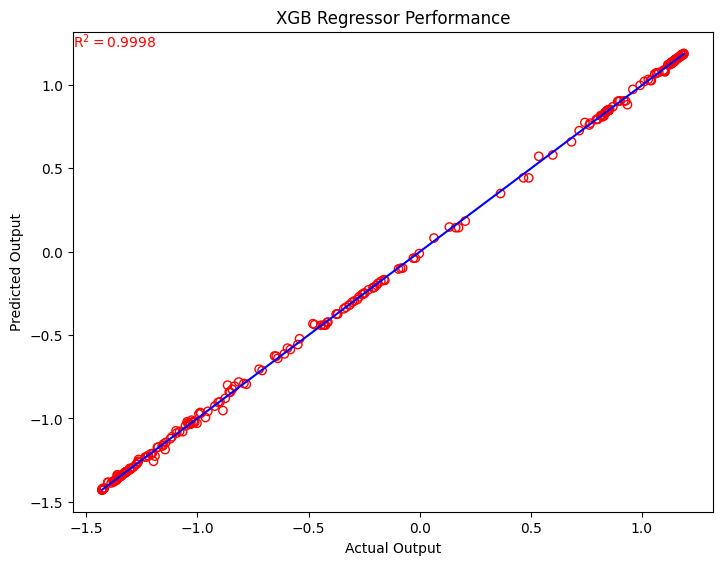

In [ ]:
#two random forest regression models are built (established random forest regression models with the optimal parameters) (Y. Pan et al., 2021, p. 7-8)

#Gradient Boosting Regressor model for [POSITIVE RATE]
print('XGBR Optimal Model for {} - Variable (Y1):'.format(Y1_features_name.upper()))
print('-----------------------------------------------------------------')

iterations = 10 # initialize iterations
XF1 = X_features
YF1 = Y1_features

best_costY1, best_posY1 = tuning_param_model(pso_swarm, XF1, YF1, iterations) # hyper parameter tuning process
regrY1, X_Y1, Y1, scaleX1, scaleY1, X_test, Y_test = set_optimal_model(XF1, YF1, best_costY1, best_posY1) # optimal model

XGBR Optimal Model for POSITIVE_RATE - Variable (Y2):
-----------------------------------------------------------------
Start the PSO Optimizer process....

Iteration: 1 | Swarms Best Cost: 0.9932
Iteration: 2 | Swarms Best Cost: 0.9932
Iteration: 3 | Swarms Best Cost: 0.9932
Iteration: 4 | Swarms Best Cost: 0.9932
Iteration: 5 | Swarms Best Cost: 0.9932
Iteration: 6 | Swarms Best Cost: 0.9932
Iteration: 7 | Swarms Best Cost: 0.9932
Iteration: 8 | Swarms Best Cost: 0.9932
Iteration: 9 | Swarms Best Cost: 0.9932
Iteration: 10 | Swarms Best Cost: 0.9932
--------------------------------------
The best cost found by our swarm is: 0.9932
The best position found by our swarm is: [37, 19, 14, 10, 7]

Optimal parameter: n=37, d=19, s=14, l=10, w=7
--------------------------------------
Root Mean Squared Error (RMSE): 0.0889
Mean Squared Error (MSE): 0.0079
Mean Absolute Error (MAE): 0.0435
Mean Absolute Percentage Error (MAPE): 0.2308
R-Squared (R2) Value of model: 0.9932


<ipython-input-34-d7ca2ce02b45>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_test, Y_pred, facecolors='none', edgecolors='r',


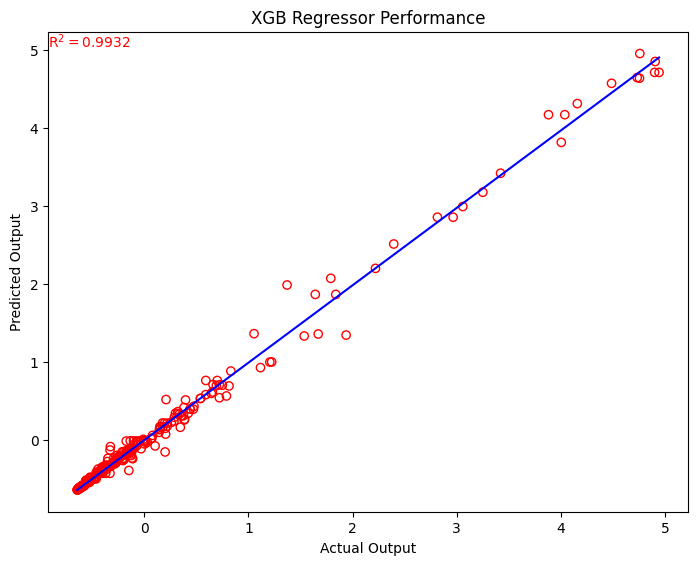

In [ ]:
# Gradient Boosting Regressor model for [MORTALITY RATE]
print('XGBR Optimal Model for {} - Variable (Y2):'.format(Y2_features_name.upper()))
print('-----------------------------------------------------------------')

iterations = 10 # initialize iterations
XF2 = X_features
YF2 = Y2_features

best_costY2, best_posY2 = tuning_param_model(pso_swarm, XF2, YF2, iterations)  # hyper parameter tuning process
regrY2, X_Y2, Y2, scaleX2, scaleY2, X_test, Y_test = set_optimal_model(XF2, YF2, best_costY2, best_posY2) # optimal model

XGBR Optimal Model for RECOVERY_RATE - Variable (Y3):
-----------------------------------------------------------------
Start the PSO Optimizer process....

Iteration: 1 | Swarms Best Cost: 0.9998
Iteration: 2 | Swarms Best Cost: 0.9998
Iteration: 3 | Swarms Best Cost: 0.9998
Iteration: 4 | Swarms Best Cost: 0.9998
Iteration: 5 | Swarms Best Cost: 0.9998
Iteration: 6 | Swarms Best Cost: 0.9998
Iteration: 7 | Swarms Best Cost: 0.9998
Iteration: 8 | Swarms Best Cost: 0.9998
Iteration: 9 | Swarms Best Cost: 0.9998
Iteration: 10 | Swarms Best Cost: 0.9998
--------------------------------------
The best cost found by our swarm is: 0.9998
The best position found by our swarm is: [38, 16, 22, 12, 7]

Optimal parameter: n=38, d=16, s=22, l=12, w=7
--------------------------------------
Root Mean Squared Error (RMSE): 0.0130
Mean Squared Error (MSE): 0.0002
Mean Absolute Error (MAE): 0.0070
Mean Absolute Percentage Error (MAPE): 0.0227
R-Squared (R2) Value of model: 0.9998


<ipython-input-34-d7ca2ce02b45>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_test, Y_pred, facecolors='none', edgecolors='r',


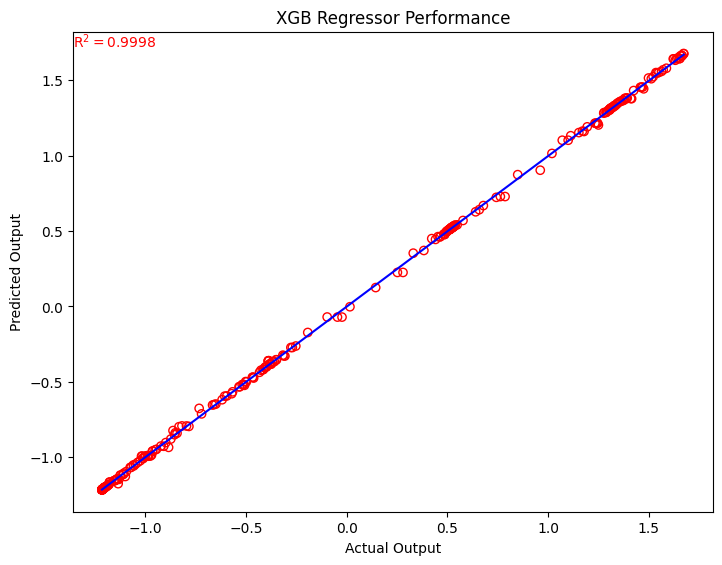

In [ ]:
# Gradient Boosting Regressor model for [RECOVERY RATE]
print('XGBR Optimal Model for {} - Variable (Y3):'.format(Y3_features_name.upper()))
print('-----------------------------------------------------------------')

iterations = 10 # initialize iterations
XF3 = X_features
YF3 = Y3_features

best_costY3, best_posY3 = tuning_param_model(pso_swarm, XF3, YF3, iterations)  # hyper parameter tuning process
regrY3, X_Y3, Y3, scaleX3, scaleY3, X_test, Y_test = set_optimal_model(XF3, YF3, best_costY3, best_posY3) # optimal model

XGBR Optimal Model for WORKPLACES - Variable (Y4):
-----------------------------------------------------------------
Start the PSO Optimizer process....

Iteration: 1 | Swarms Best Cost: 0.9592
Iteration: 2 | Swarms Best Cost: 0.9593
Iteration: 3 | Swarms Best Cost: 0.9593
Iteration: 4 | Swarms Best Cost: 0.9593
Iteration: 5 | Swarms Best Cost: 0.9593
Iteration: 6 | Swarms Best Cost: 0.9593
Iteration: 7 | Swarms Best Cost: 0.9593
Iteration: 8 | Swarms Best Cost: 0.9593
Iteration: 9 | Swarms Best Cost: 0.9593
Iteration: 10 | Swarms Best Cost: 0.9593
--------------------------------------
The best cost found by our swarm is: 0.9593
The best position found by our swarm is: [37, 22, 26, 13, 7]

Optimal parameter: n=37, d=22, s=26, l=13, w=7
--------------------------------------
Root Mean Squared Error (RMSE): 0.2121
Mean Squared Error (MSE): 0.0450
Mean Absolute Error (MAE): 0.1034
Mean Absolute Percentage Error (MAPE): 0.5302
R-Squared (R2) Value of model: 0.9593


<ipython-input-34-d7ca2ce02b45>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_test, Y_pred, facecolors='none', edgecolors='r',


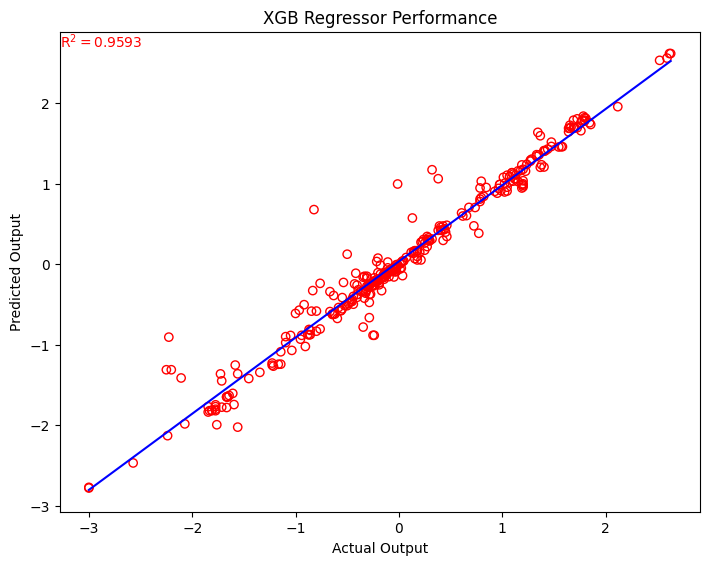

In [ ]:
# Gradient Boosting Regressor model for WORKPLACES]
print('XGBR Optimal Model for {} - Variable (Y4):'.format(Y4_features_name.upper()))
print('-----------------------------------------------------------------')

iterations = 10 # initialize iterations
XF4 = X_features
YF4 = Y4_features

best_costY4, best_posY4 = tuning_param_model(pso_swarm, XF4, YF4, iterations)  # hyper parameter tuning process
regrY4, X_Y4, Y4, scaleX4, scaleY4, X_test, Y_test = set_optimal_model(XF4, YF4, best_costY4, best_posY4) # optimal model

XGBR Optimal Model for DIFF_IDR - Variable (Y5):
-----------------------------------------------------------------
Start the PSO Optimizer process....

Iteration: 1 | Swarms Best Cost: 0.7610
Iteration: 2 | Swarms Best Cost: 0.7610
Iteration: 3 | Swarms Best Cost: 0.7610
Iteration: 4 | Swarms Best Cost: 0.7611
Iteration: 5 | Swarms Best Cost: 0.7611
Iteration: 6 | Swarms Best Cost: 0.7611
Iteration: 7 | Swarms Best Cost: 0.7611
Iteration: 8 | Swarms Best Cost: 0.7611
Iteration: 9 | Swarms Best Cost: 0.7611
Iteration: 10 | Swarms Best Cost: 0.7611
--------------------------------------
The best cost found by our swarm is: 0.7611
The best position found by our swarm is: [37, 18, 28, 13, 7]

Optimal parameter: n=37, d=18, s=28, l=13, w=7
--------------------------------------
Root Mean Squared Error (RMSE): 0.4754
Mean Squared Error (MSE): 0.2260
Mean Absolute Error (MAE): 0.2331
Mean Absolute Percentage Error (MAPE): 0.5480
R-Squared (R2) Value of model: 0.7611


<ipython-input-34-d7ca2ce02b45>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_test, Y_pred, facecolors='none', edgecolors='r',


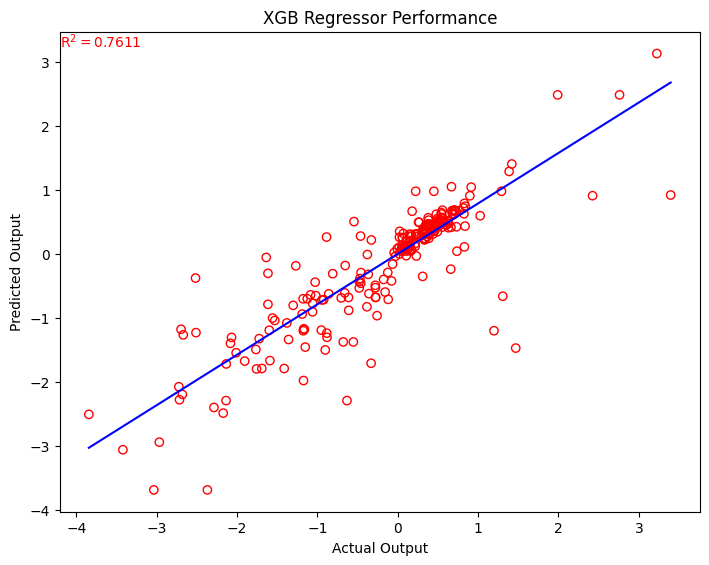

In [ ]:
# Gradient Boosting Regressor model for [DIFFERENCE IDR]
print('XGBR Optimal Model for {} - Variable (Y5):'.format(Y5_features_name.upper()))
print('-----------------------------------------------------------------')

iterations = 10 # initialize iterations
XF5 = X_features
YF5 = Y5_features

best_costY5, best_posY5 = tuning_param_model(pso_swarm, XF5, YF5, iterations)  # hyper parameter tuning process
regrY5, X_Y5, Y5, scaleX5, scaleY5, X_test, Y_test = set_optimal_model(XF5, YF5, best_costY5, best_posY5) # optimal model

XGBR Optimal Model for DIFF_IHSG - Variable (Y6):
-----------------------------------------------------------------
Start the PSO Optimizer process....

Iteration: 1 | Swarms Best Cost: 0.5946
Iteration: 2 | Swarms Best Cost: 0.5946
Iteration: 3 | Swarms Best Cost: 0.5946
Iteration: 4 | Swarms Best Cost: 0.5946
Iteration: 5 | Swarms Best Cost: 0.5946
Iteration: 6 | Swarms Best Cost: 0.5946
Iteration: 7 | Swarms Best Cost: 0.5946
Iteration: 8 | Swarms Best Cost: 0.5946
Iteration: 9 | Swarms Best Cost: 0.5946
Iteration: 10 | Swarms Best Cost: 0.5946
--------------------------------------
The best cost found by our swarm is: 0.5946
The best position found by our swarm is: [37, 20, 26, 12, 7]

Optimal parameter: n=37, d=20, s=26, l=12, w=7
--------------------------------------
Root Mean Squared Error (RMSE): 0.6274
Mean Squared Error (MSE): 0.3937
Mean Absolute Error (MAE): 0.3776
Mean Absolute Percentage Error (MAPE): 1.7271
R-Squared (R2) Value of model: 0.5946


<ipython-input-34-d7ca2ce02b45>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_test, Y_pred, facecolors='none', edgecolors='r',


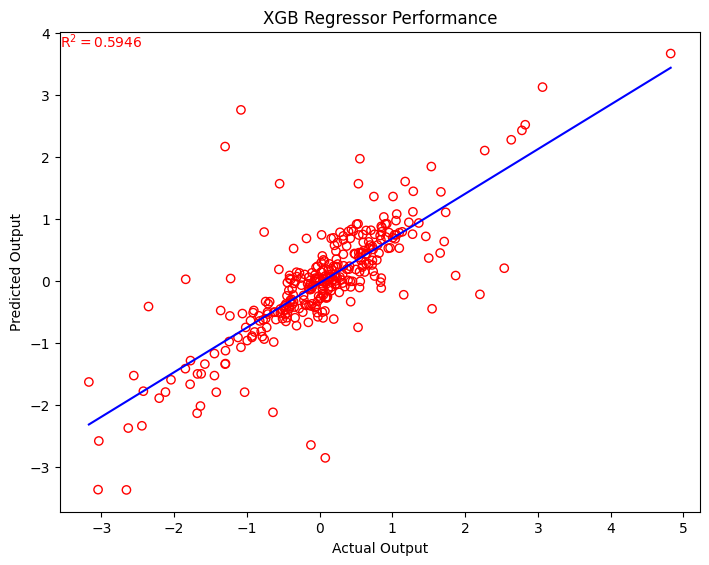

In [ ]:
# Gradient Boosting Regressor model for [DIFFERENCE IHSG]
print('XGBR Optimal Model for {} - Variable (Y6):'.format(Y6_features_name.upper()))
print('-----------------------------------------------------------------')

iterations = 10 # initialize iterations
XF6 = X_features
YF6 = Y6_features

best_costY6, best_posY6 = tuning_param_model(pso_swarm, XF6, YF6, iterations)  # hyper parameter tuning process
regrY6, X_Y6, Y6, scaleX6, scaleY6, X_test, Y_test = set_optimal_model(XF6, YF6, best_costY6, best_posY6) # optimal model

### Feature Importance Measurement using Mean Decrease in Impurity (MDI)

In [ ]:
def MDI_process(regr, title, X_features_name, X_test, Y_test):
  feature_importance = regr.feature_importances_
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + 0.5
  fig = plt.figure(figsize=(12, 6))

  result = permutation_importance(
      regr, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
  )
  sorted_idx = result.importances_mean.argsort()
  plt.subplot(1, 2, 2)
  plt.boxplot(
      result.importances[sorted_idx].T,
      vert=False,
      labels=np.array(X_features_name)[sorted_idx],
  )
  plt.title(title)
  fig.tight_layout()
  plt.show()

<ipython-input-42-246103315f15>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


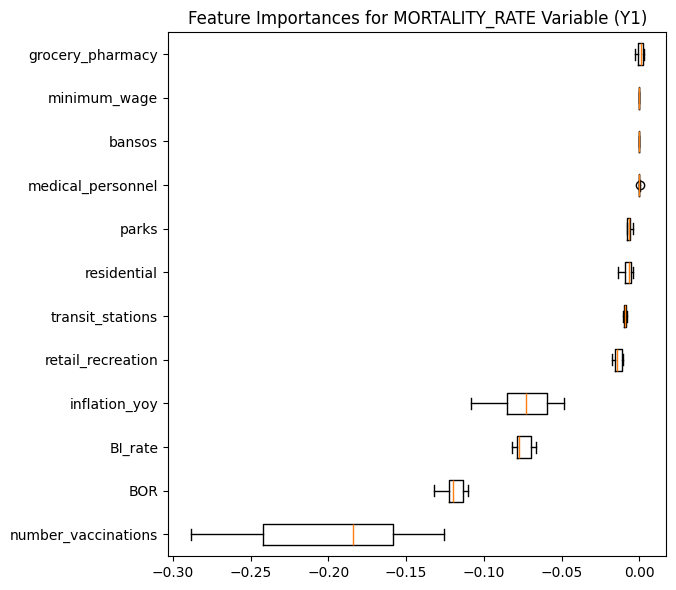

In [ ]:
MDI_process(regrY1, 'Feature Importances for {} {}'.format(Y1_features_name.upper(), 'Variable (Y1)'), X_features_name, X_test, Y_test)

<ipython-input-42-246103315f15>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


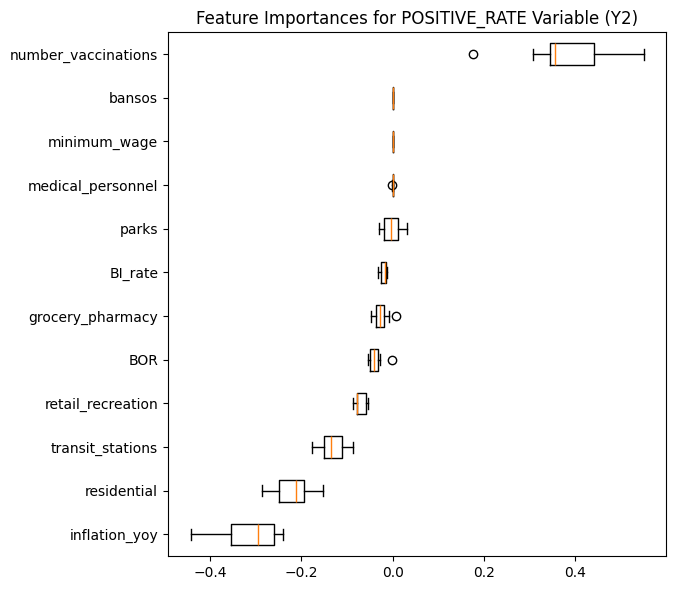

In [ ]:
MDI_process(regrY2, 'Feature Importances for {} {}'.format(Y2_features_name.upper(), 'Variable (Y2)'), X_features_name, X_test, Y_test)

<ipython-input-42-246103315f15>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


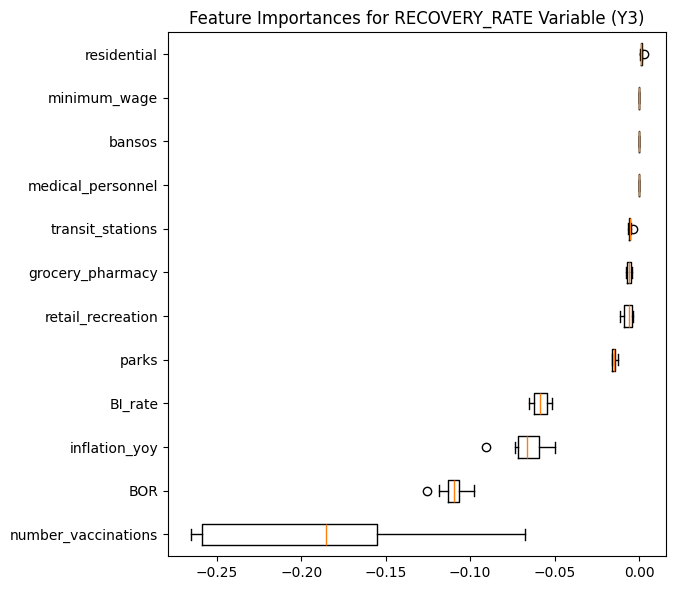

In [ ]:
MDI_process(regrY3, 'Feature Importances for {} {}'.format(Y3_features_name.upper(), 'Variable (Y3)'), X_features_name, X_test, Y_test)

<ipython-input-42-246103315f15>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


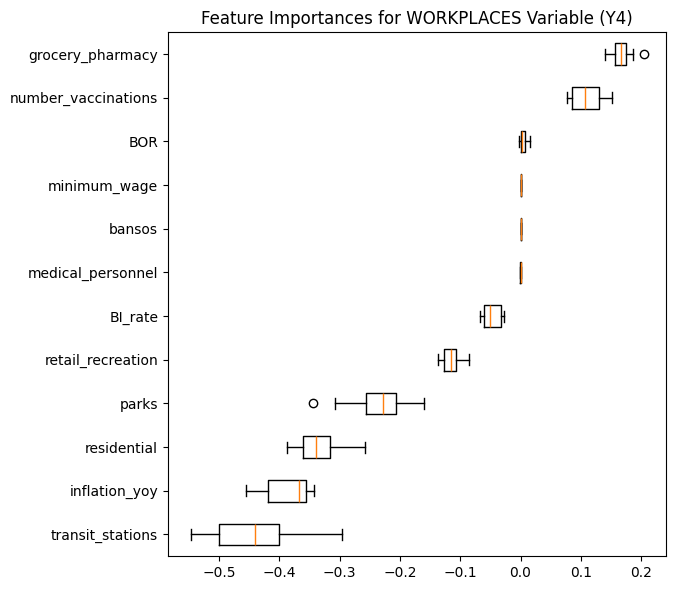

In [ ]:
MDI_process(regrY4, 'Feature Importances for {} {}'.format(Y4_features_name.upper(), 'Variable (Y4)'), X_features_name, X_test, Y_test)

<ipython-input-42-246103315f15>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


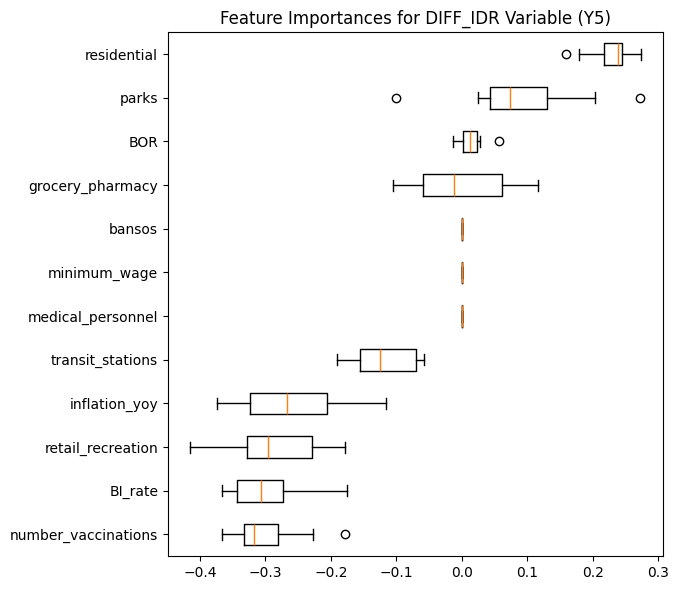

In [ ]:
MDI_process(regrY5, 'Feature Importances for {} {}'.format(Y5_features_name.upper(), 'Variable (Y5)'), X_features_name, X_test, Y_test)

<ipython-input-42-246103315f15>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


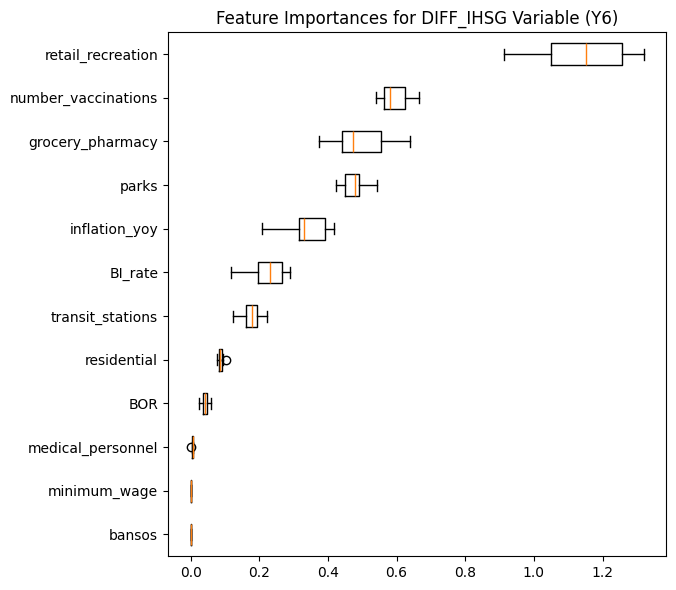

In [ ]:
MDI_process(regrY6, 'Feature Importances for {} {}'.format(Y6_features_name.upper(), 'Variable (Y6)'), X_features_name, X_test, Y_test)

### Feature Importance Measurement using TreeSHAP

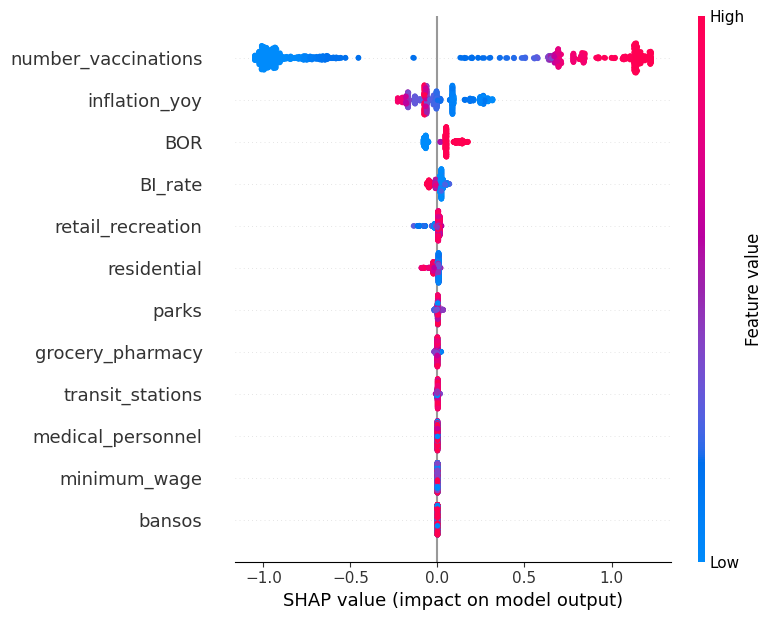

In [ ]:
# Explain with tree SHAP for MORTALITY_RATE Variable (Y1)
explainer_Y1 = shap.TreeExplainer(regrY1)
shap_values_Y1 = explainer_Y1.shap_values(X_Y1)
shap.summary_plot(shap_values_Y1, X_Y1, feature_names=X_features_name)

In [ ]:
shap.initjs()
shap.force_plot(explainer_Y1.expected_value, shap_values_Y1, feature_names=X_features_name)

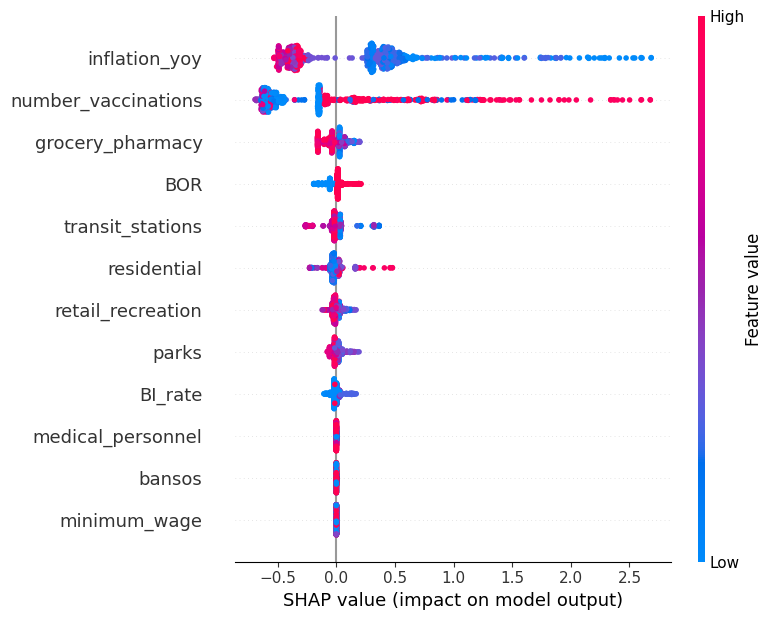

In [ ]:
# Explain with tree SHAP for POSITIVE_RATE Variable (Y2)
explainer_Y2 = shap.TreeExplainer(regrY2)
shap_values_Y2 = explainer_Y2.shap_values(X_Y2)
shap.summary_plot(shap_values_Y2, X_Y2, feature_names=X_features_name)

In [ ]:
shap.initjs()
shap.force_plot(explainer_Y2.expected_value, shap_values_Y2, feature_names=X_features_name)

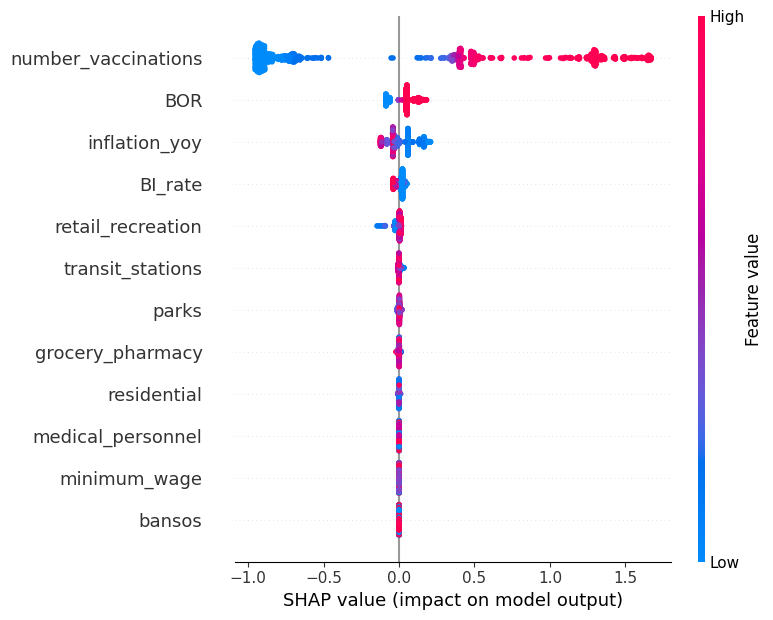

In [ ]:
# Explain with tree SHAP for RECOVERY_RATE Variable (Y3)
explainer_Y3 = shap.TreeExplainer(regrY3)
shap_values_Y3 = explainer_Y3.shap_values(X_Y3)
shap.summary_plot(shap_values_Y3, X_Y3, feature_names=X_features_name)

In [ ]:
shap.initjs()
shap.force_plot(explainer_Y3.expected_value, shap_values_Y3, feature_names=X_features_name)

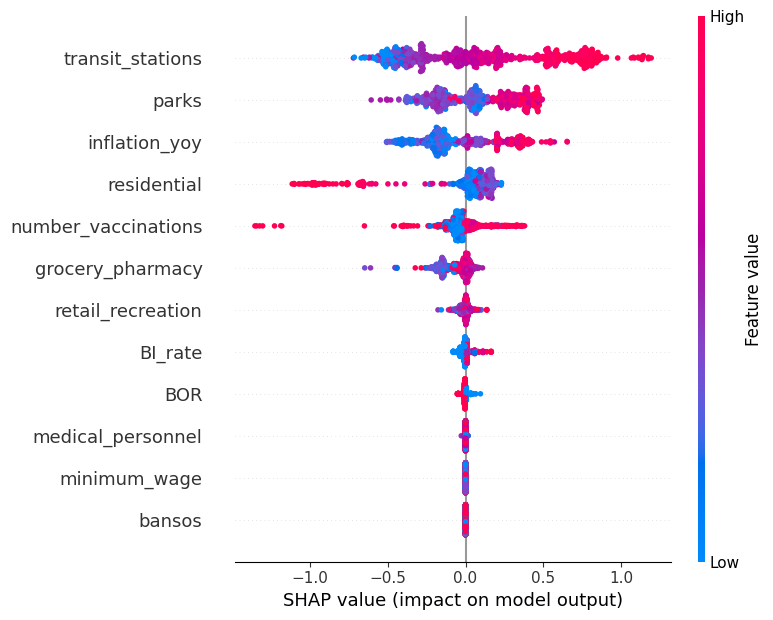

In [ ]:
# Explain with tree SHAP for WORKPLACES Variable (Y4)
explainer_Y4 = shap.TreeExplainer(regrY4)
shap_values_Y4 = explainer_Y4.shap_values(X_Y4)
shap.summary_plot(shap_values_Y4, X_Y4, feature_names=X_features_name)

In [ ]:
shap.initjs()
shap.force_plot(explainer_Y4.expected_value, shap_values_Y4, feature_names=X_features_name)

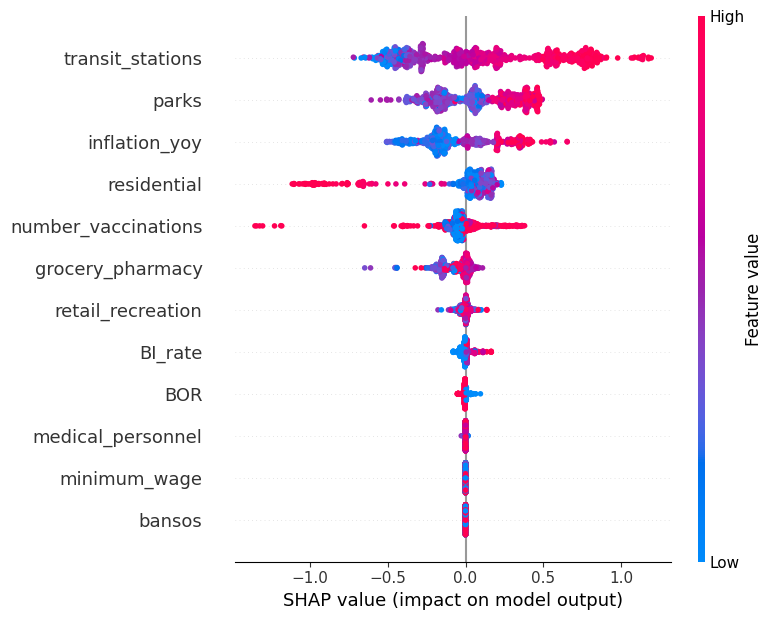

In [ ]:
# Explain with tree SHAP for DIFF_IDR Variable (Y5)
explainer_Y5 = shap.TreeExplainer(regrY5)
shap_values_Y5 = explainer_Y4.shap_values(X_Y5)
shap.summary_plot(shap_values_Y5, X_Y5, feature_names=X_features_name)

In [ ]:
shap.initjs()
shap.force_plot(explainer_Y5.expected_value, shap_values_Y5, feature_names=X_features_name)

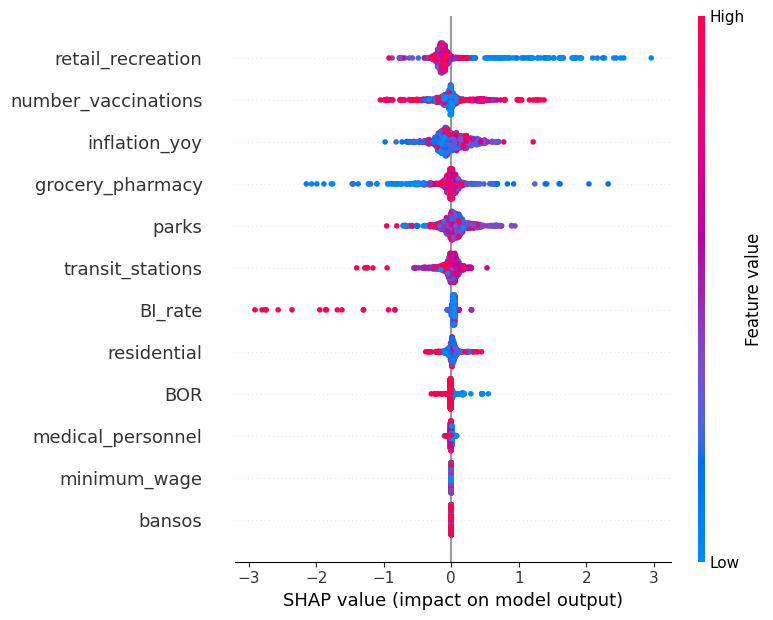

In [ ]:
# Explain with tree SHAP for DIFF_IHSG Variable (Y6)
explainer_Y6 = shap.TreeExplainer(regrY6)
shap_values_Y6 = explainer_Y6.shap_values(X_Y6)
shap.summary_plot(shap_values_Y6, X_Y6, feature_names=X_features_name)

In [ ]:
shap.initjs()
shap.force_plot(explainer_Y6.expected_value, shap_values_Y6, feature_names=X_features_name)

## Save Data for Use in the Novelty SHAPPI

In [ ]:
import joblib

data_saved = {
    'X' : X,
    'X_Y1' : X_Y1,
    'X_Y2' : X_Y2,
    'X_Y3' : X_Y3,
    'X_Y4' : X_Y4,
    'X_Y5' : X_Y5,
    'X_Y6' : X_Y6,
    'Y1' : Y1,
    'Y2' : Y2,
    'Y3' : Y3,
    'Y4' : Y4,
    'Y5' : Y5,
    'Y6' : Y6,
    'regrY1' : regrY1,
    'regrY2' : regrY2,
    'regrY3' : regrY3,
    'regrY4' : regrY4,
    'regrY5' : regrY5,
    'regrY6' : regrY6,
    'n_dim_X_features' : n_dim_X_features,
    'n_dim_Y_features' : n_dim_Y_features,
    'X_features_name' : X_features_name,
    'Y_features_name' : Y_features_name,
    'shap_values_Y1' : shap_values_Y1,
    'shap_values_Y2' : shap_values_Y2,
    'shap_values_Y3' : shap_values_Y3,
    'shap_values_Y4' : shap_values_Y4,
    'shap_values_Y5' : shap_values_Y5,
    'shap_values_Y6' : shap_values_Y6
}

joblib.dump(data_saved, folder_drive + 'data_saved1.job')

['/content/drive/MyDrive/Dokument S3 Bismillah/Data/data_saved1.job']